## Poisson equation with periodic boundary conditions

In one dimension, the Poisson equation is defined as:

\begin{equation*}
    \frac{d ^ 2 \psi (t)}{d t ^ 2} = - f (t)
\end{equation*}

Where $f(t)$ is a known function often called *source*. The periodic boundary conditions are:

\begin{cases}
    \psi (t = T) = \psi (t = 0) \\
    \frac{d \psi}{d t} (t = T) = \frac{d \psi}{d t} (t = 0)
\end{cases}

One possible way to solve this problem is applying the Fourier Transform, obtaining:

\begin{equation*}
    \Psi (\omega) = \frac{F (\omega)}{\omega ^ 2}
\end{equation*}

That holds for $\omega \neq 0$. We impose the mean value of the source must be zero. Otherwise, there is not any solution for the problem. \
$\psi (t)$ is given by:

\begin{equation*}
    \psi (t) = \mathcal{F} ^ {-1} \left( \frac{F (\omega)}{\omega ^ 2} \right)
\end{equation*}

We're going to compute the Fourier transforms using the **numpy.fft** module

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fast") # Minimalistic plots

Let's solve:

\begin{equation*}
    \frac{d ^ 2 \psi (t)}{d t ^ 2} = - \sin \left( \frac{t}{2} \right) \cos ^ 2 (t)
\end{equation*}

With conditions:

\begin{cases}
    \psi (t = 0) = \psi (t = 4 \pi) \\
    \frac{d \psi}{d t} (t = 0) = \frac{d \psi}{ d t} (t = 4 \pi)
\end{cases}

In [2]:
# Parameters
T = 4 * np.pi
N = 1000
dt = T / N
t = np.linspace(0, T, N, endpoint = False)  # Periodic domain (excluding t = T)

In [3]:
# Source term f(t)
f = np.sin(t / 2) * (np.cos(t)) ** 2
f = f - np.mean(f) # f mean must be zero

In [4]:
# Computing the FFT of f(t)
F = np.fft.fft(f)
F

array([-1.70922713e-15+0.00000000e+00j,  1.84165251e-14-2.50000000e+02j,
        1.83170521e-15+1.13399712e-14j, -3.10144203e-14+1.25000000e+02j,
       -1.08132627e-15-1.75483917e-14j,  5.16139283e-14-1.25000000e+02j,
        1.63074610e-15+1.38341489e-14j, -3.34211145e-15+9.10382880e-15j,
        4.99396123e-16+4.66246241e-15j,  6.97414076e-15+5.80038177e-15j,
       -1.82300169e-15+3.49009890e-15j, -3.17406007e-15+2.83423189e-16j,
        2.83373803e-15+9.26252005e-16j, -2.77739232e-16+5.48328859e-15j,
       -2.38469972e-15+2.29611226e-15j,  5.05189724e-15-1.48362440e-15j,
        1.85207624e-15+2.28634153e-15j, -5.33381268e-16+4.41975973e-15j,
       -6.39922969e-16+1.11370724e-15j, -8.12904994e-15-2.56462393e-15j,
        1.78262223e-16+2.24505948e-15j, -1.43479516e-15+3.66505231e-15j,
        8.09888259e-16+8.95418137e-16j, -1.36404692e-15+1.35854659e-15j,
       -2.48892073e-15-6.50990188e-16j,  9.85421181e-16+2.44071680e-15j,
        1.51969084e-15+2.13186622e-15j, -4.18200890

In [5]:
# Max value of real(F) is pratically zero
np.max(np.abs(np.real(F)))

np.float64(5.161392826761756e-14)

In [6]:
# Max value of imag(F)
np.max(np.abs(np.imag(F)))

np.float64(250.00000000000003)

In [7]:
# Computing omega (FFT frequencies)
omega = 2 * np.pi * np.fft.fftfreq(N, d = dt)

omega_2 = omega ** 2
omega_2[0] = 1.0  # Avoid division by zero

omega

array([   0. ,    0.5,    1. ,    1.5,    2. ,    2.5,    3. ,    3.5,
          4. ,    4.5,    5. ,    5.5,    6. ,    6.5,    7. ,    7.5,
          8. ,    8.5,    9. ,    9.5,   10. ,   10.5,   11. ,   11.5,
         12. ,   12.5,   13. ,   13.5,   14. ,   14.5,   15. ,   15.5,
         16. ,   16.5,   17. ,   17.5,   18. ,   18.5,   19. ,   19.5,
         20. ,   20.5,   21. ,   21.5,   22. ,   22.5,   23. ,   23.5,
         24. ,   24.5,   25. ,   25.5,   26. ,   26.5,   27. ,   27.5,
         28. ,   28.5,   29. ,   29.5,   30. ,   30.5,   31. ,   31.5,
         32. ,   32.5,   33. ,   33.5,   34. ,   34.5,   35. ,   35.5,
         36. ,   36.5,   37. ,   37.5,   38. ,   38.5,   39. ,   39.5,
         40. ,   40.5,   41. ,   41.5,   42. ,   42.5,   43. ,   43.5,
         44. ,   44.5,   45. ,   45.5,   46. ,   46.5,   47. ,   47.5,
         48. ,   48.5,   49. ,   49.5,   50. ,   50.5,   51. ,   51.5,
         52. ,   52.5,   53. ,   53.5,   54. ,   54.5,   55. ,   55.5,
      

In [8]:
# Solving in the Fourier space
Psi = F / omega_2

# Inverse FFT to get psi
psi = np.real(np.fft.ifft(Psi))

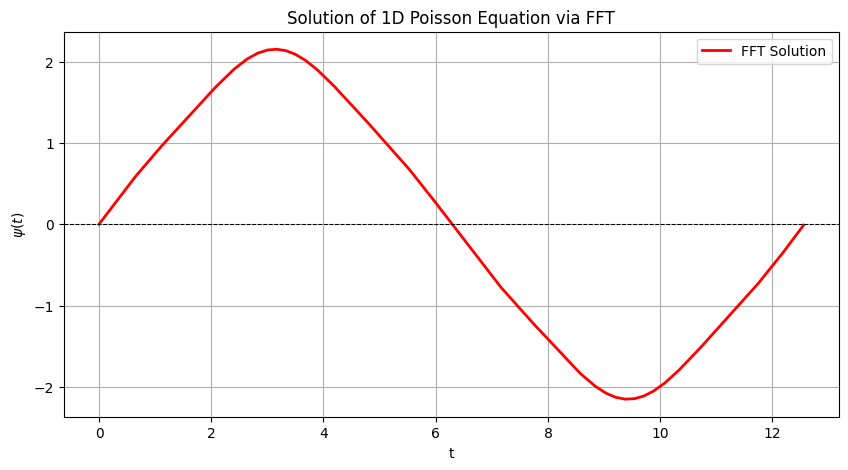

In [9]:
# Plotting results
plt.figure(figsize = (10, 5))
plt.plot(t, psi, color = 'red', linewidth = 2, label = 'FFT Solution')
plt.xlabel('t')
plt.ylabel(r'$\psi(t)$')
plt.legend()
plt.title('Solution of 1D Poisson Equation via FFT')
plt.grid(True)
plt.axhline(linestyle = "--", color = "black", linewidth = 0.75)
plt.show()

Let's extend the problem to two dimensions. We're going to solve:

\begin{equation*}
    \Delta \psi (x, y) = - \sin (x y) \cos (x y) + m
\end{equation*}

Where $m$ is the mean value of the *source*. Applying these conditions on the square with unit length:

\begin{cases}
    \psi (x = 0, y) = \psi (x = 1, y) \\
    \psi (x, y = 0) = \psi (x, y = 1) \\
    \frac{\partial \psi}{\partial x} (x = 0, y) = \frac{\partial \psi}{\partial x} (x = 1, y) \\
    \frac{\partial \psi}{\partial y} (x, y = 0) = \frac{\partial \psi}{\partial y} (x, y = 1) \\

\end{cases}

In [10]:
# Parameters 2D
a = 1.0
N = 500
d = a / N

In [11]:
# Creating the grid
x = np.linspace(0, a, N, endpoint = False)
X, Y = np.meshgrid(x, x, indexing = "ij")

In [12]:
# Source term f(x, y) with zero mean
source = lambda x, y: np.sin(x * y) * np.cos(x * y)
f = source(X, Y)
f = f - np.mean(f)

In [13]:
# Computing wave numbers (FFT frequencies)
k = 2 * np.pi * np.fft.fftfreq(N, d = d)
kx_grid, ky_grid = np.meshgrid(k, k, indexing = "ij")

k_squared = kx_grid ** 2 + ky_grid ** 2
k_squared[0, 0] = 1.0  # Avoid division by zero

k

array([    0.        ,     6.28318531,    12.56637061,    18.84955592,
          25.13274123,    31.41592654,    37.69911184,    43.98229715,
          50.26548246,    56.54866776,    62.83185307,    69.11503838,
          75.39822369,    81.68140899,    87.9645943 ,    94.24777961,
         100.53096491,   106.81415022,   113.09733553,   119.38052084,
         125.66370614,   131.94689145,   138.23007676,   144.51326207,
         150.79644737,   157.07963268,   163.36281799,   169.64600329,
         175.9291886 ,   182.21237391,   188.49555922,   194.77874452,
         201.06192983,   207.34511514,   213.62830044,   219.91148575,
         226.19467106,   232.47785637,   238.76104167,   245.04422698,
         251.32741229,   257.61059759,   263.8937829 ,   270.17696821,
         276.46015352,   282.74333882,   289.02652413,   295.30970944,
         301.59289474,   307.87608005,   314.15926536,   320.44245067,
         326.72563597,   333.00882128,   339.29200659,   345.57519189,
      

In [14]:
# Computing FFT of f
F = np.fft.fft2(f)
F

array([[ 1.18660637e-12+0.00000000e+00j, -2.78684765e+03+1.47307190e+04j,
        -7.28977293e+02+7.11269856e+03j, ...,
        -3.70502499e+02-4.71210484e+03j, -7.28977293e+02-7.11269856e+03j,
        -2.78684765e+03-1.47307190e+04j],
       [-2.78684765e+03+1.47307190e+04j, -4.26363879e+03-2.95749266e+03j,
        -1.79532589e+03-1.15487046e+03j, ...,
         1.01972227e+03+3.58914104e+02j,  1.49247277e+03+4.23066956e+02j,
         2.85461572e+03+1.95399252e-14j],
       [-7.28977293e+02+7.11269856e+03j, -1.79532589e+03-1.15487046e+03j,
        -7.88623395e+02-3.80479250e+02j, ...,
         4.85885236e+02+3.88708321e+01j,  7.26876156e+02-3.55271368e-15j,
         1.49247277e+03-4.23066956e+02j],
       ...,
       [-3.70502499e+02-4.71210484e+03j,  1.01972227e+03+3.58914104e+02j,
         4.85885236e+02+3.88708321e+01j, ...,
        -3.31716453e+02+1.18651918e+02j, -5.09897702e+02+2.16177693e+02j,
        -1.14054309e+03+7.03628847e+02j],
       [-7.28977293e+02-7.11269856e+03j,  1.

In [15]:
# Solving for Psi in Fourier space
Psi = np.zeros_like(F, dtype = complex)

nonzero_mask = k_squared != 0
nonzero_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], shape=(500, 500))

In [16]:
# Applying the mask
Psi[nonzero_mask] = F[nonzero_mask] / k_squared[nonzero_mask]
Psi

array([[ 1.18660637e-12+0.00000000e+00j, -7.05916757e+01+3.73133472e+02j,
        -4.61630264e+00+4.50416898e+01j, ...,
        -1.04277088e+00-1.32621122e+01j, -4.61630264e+00-4.50416898e+01j,
        -7.05916757e+01-3.73133472e+02j],
       [-7.05916757e+01+3.73133472e+02j, -5.39996161e+01-3.74570822e+01j,
        -9.09522719e+00-5.85064211e+00j, ...,
         2.58298668e+00+9.09140047e-01j,  7.56095539e+00+2.14328224e+00j,
         3.61541304e+01+2.47476044e-16j],
       [-4.61630264e+00+4.50416898e+01j, -9.09522719e+00-5.85064211e+00j,
        -2.49700799e+00-1.20470650e+00j, ...,
         9.46739754e-01+7.57392061e-02j,  2.30149851e+00-1.12489111e-17j,
         7.56095539e+00-2.14328224e+00j],
       ...,
       [-1.04277088e+00-1.32621122e+01j,  2.58298668e+00+9.09140047e-01j,
         9.46739754e-01+7.57392061e-02j, ...,
        -4.66804217e-01+1.66971566e-01j, -9.93527667e-01+4.21218841e-01j,
        -2.88902939e+00+1.78231269e+00j],
       [-4.61630264e+00-4.50416898e+01j,  7.

In [17]:
# Inverse FFT to get psi
psi = np.real(np.fft.ifft2(Psi))
psi

array([[-0.00141355, -0.00146282, -0.00151154, ..., -0.00126476,
        -0.00131423, -0.00136388],
       [-0.00146282, -0.00151103, -0.00155881, ..., -0.00131726,
        -0.00136578, -0.00141435],
       [-0.00151154, -0.00155881, -0.00160574, ..., -0.00136876,
        -0.00141639, -0.00146402],
       ...,
       [-0.00126476, -0.00131726, -0.00136876, ..., -0.00110614,
        -0.00115847, -0.00121139],
       [-0.00131423, -0.00136578, -0.00141639, ..., -0.00115847,
        -0.0012099 , -0.00126185],
       [-0.00136388, -0.00141435, -0.00146402, ..., -0.00121139,
        -0.00126185, -0.00131271]], shape=(500, 500))

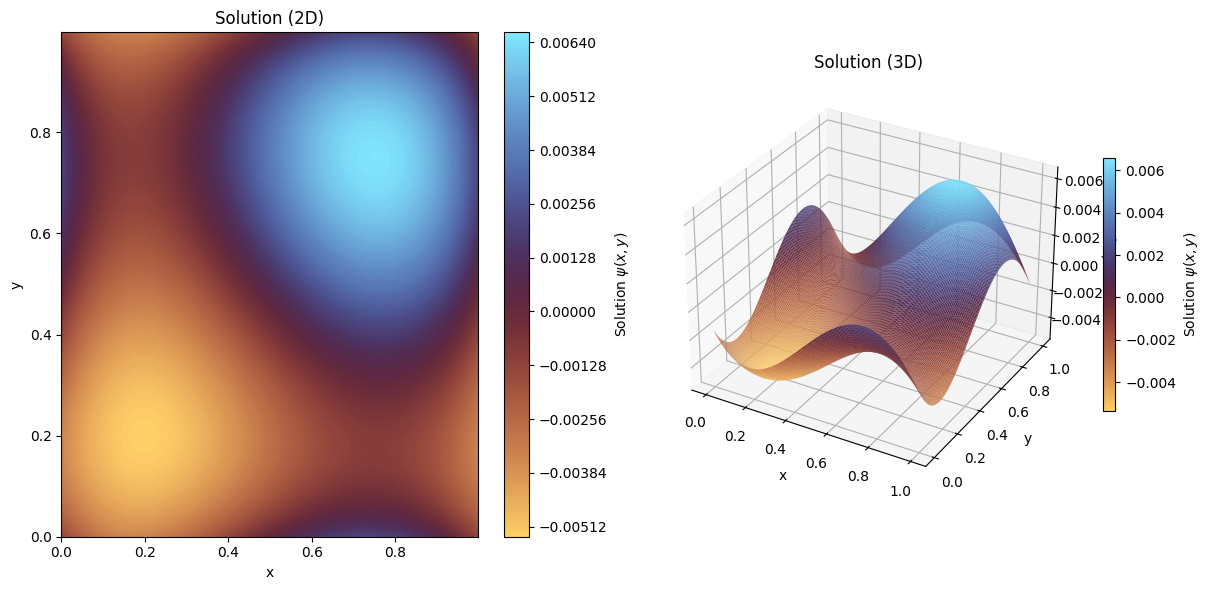

In [18]:
# Plot results
fig = plt.figure(figsize = (18, 6))

# 2D Contour Plot: Solution
plt.subplot(1, 3, 1)
plt.contourf(X, Y, psi, cmap="managua", levels = 150)
plt.colorbar(label = r"Solution $\psi(x,y)$")
plt.title("Solution (2D)")
plt.xlabel("x")
plt.ylabel("y")

# 3D Surface Plot: Solution
ax = fig.add_subplot(1, 3, 2, projection = "3d")
surf = ax.plot_surface(X, Y, psi, cmap = "managua", rstride = 3, cstride = 3)
fig.colorbar(surf, ax = ax, shrink = 0.5, label=r"Solution $\psi (x,y)$")
ax.set_title("Solution (3D)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel(r"$\psi (x,y)$")

plt.tight_layout()
plt.show()